# T-Test

In [11]:
from ttest_key import datasets, poi_selector_name, selection_functions
import numpy as np
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

In [12]:
engines = [
    lascar.TTestEngine(
        name=f"{poi_selector_name} for {guess}",
        partition_function=selection_functions(guess),
    )
    for guess in range(170, 173)
]

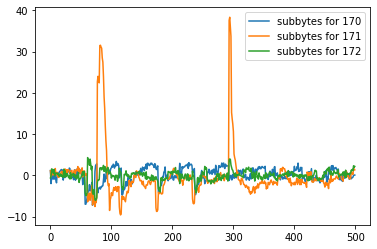

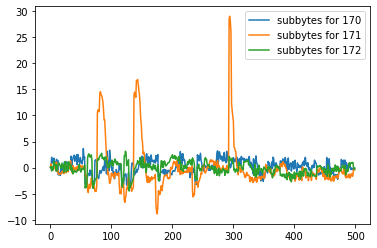

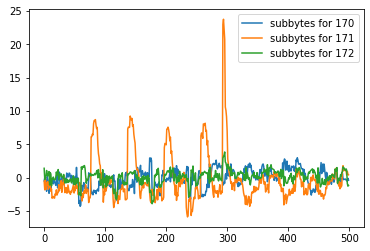

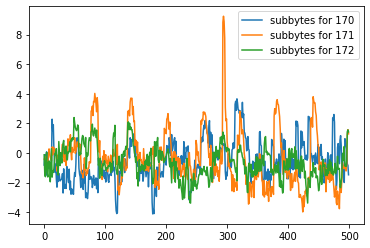

In [13]:
for dataname, data in datasets.items():
    trace = lascar.TraceBatchContainer(data['trace'], data)
    session = lascar.Session(
        trace,
        engines=engines,
        output_method=lascar.MatPlotLibOutputMethod(*engines, single_plot=True, legend=True),
        progressbar=False,
    )
    session.run(batch_size=10_000, thread_on_update=False)